Legendre fit chi-square: 5.223361484161534
Chebyshev fit chi-square:  5.223361484161513
Hermite fit chi-square:  5.2233614841614955
Polynomial fit chi-square:  12.221116666016815

Legendre fit Avg Execution Time: 0.5702513000893831  milliseconds
Chebyshev fit Avg Execution Time: 0.581789650394275  milliseconds
Hermite fit Avg Execution Time: 0.5778616845013691  milliseconds
Polynomial fit Avg Execution Time: 0.5841255187988281  milliseconds

Legendre fit Max Execution Time: 1.0418891906738281  milliseconds
Chebyshev fit Max Execution Time: 1.9996166229248047  milliseconds
Hermite fit Max Execution Time: 1.0535717010498047  milliseconds
Polynomial fit Max Execution Time: 4.001140594482422  milliseconds


 [astropy.modeling.fitting]


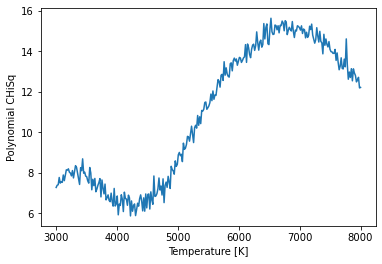

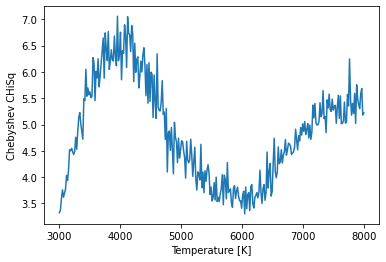

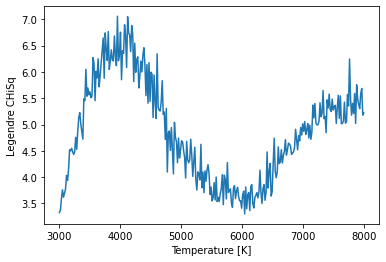

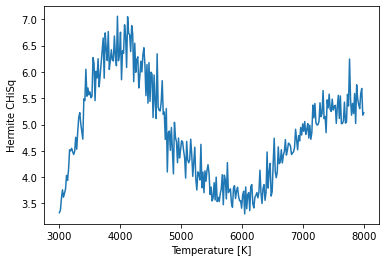

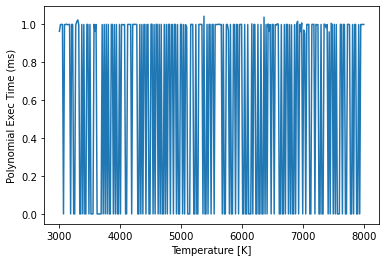

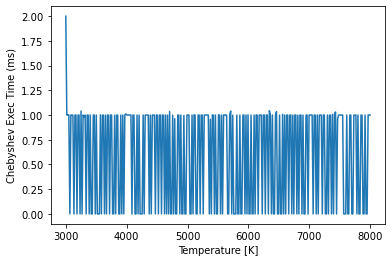

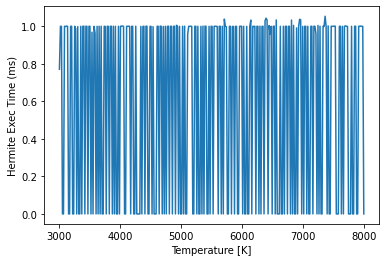

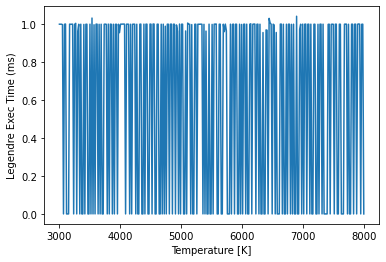

In [3]:
import numpy as np  
import matplotlib.pyplot as plt
from astropy import modeling
from astropy.modeling.polynomial import Polynomial1D, Chebyshev1D, Legendre1D, Hermite1D
from astropy.modeling import fitting
import time
# these classes are made for astronomy data analysis; come from ASTR 3800
import ModelClass as mc
import StatsClass as sc
import DataClass as dc

# create dictionary to store exec times of fitting models
execTimes = {
    "ChebFit" : [],
    "LegendreFit" : [],
    "HermiteFit" : [],
    "PolyFit" : []
}

# create instrument and star class for use in creating model blackbody spectra
class Instrument:
    def __init__(self, name = 'Unnamed', nlam = 100, lam_min = 100., lam_max = 1000., area = 1.):
        self.name = name
        self.nlam = nlam
        self.lam_min = lam_min
        self.lam_max = lam_max
        self.lam = np.linspace(lam_min, lam_max, nlam)
        self.lambin = (lam_max - lam_min) / float(nlam)
        self.area = self.lam * 0 + area
            
class Star():
    def __init__(self, name = '', m = 0, dist = 0, T = 0, radius = 0):
        self.name = name
        self.m = m
        self.dist = dist    # parsecs
        self.T = T          # F
        self.r = radius          # meters
        
#################################################################
# FUNCTIONS
def calcChiSq(original_y,fit_y):
    fit_std = np.std(fit_y)
    residuals = fit_y - original_y 
    chisq = np.sum((residuals / fit_std)**2)
    return chisq

def avgTime(fitExecTimes):
    sum = 0
    for t in fitExecTimes:
        sum += t;
        
    return sum / len(fitExecTimes)

def plotResults(original_x,original_y,noisy_x,noisy_y,fit_y,title):
    plt.plot(noisy_x, fit_y, label = "polynomial fit", color = 'r')
    plt.plot(original_x,original_y, label = "clean data", color = 'g')
    plt.scatter(noisy_x,noisy_y, label = "noisy data")
    plt.legend()
    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Brightness")
    plt.title(title)
    plt.grid()

def ChebFit(original_x,original_y,noisy_x, noisy_y): #ifPlot):
    # MODEL
    degree = 4
    cheby_model = modeling.polynomial.Chebyshev1D(degree = degree)
    fitter = fitting.LinearLSQFitter()                                 # could try other fitters
    
    st = time.time()  # get start time
    best_fit = fitter(cheby_model, noisy_x, noisy_y)
    et = time.time()  # get end time
    
    fit_y = best_fit(noisy_x)
    
    execTimes["ChebFit"].append((et - st) * 1000); # in milliseconds
    
    #if ifPlot == 1:
    #    figTitle = "Chebychev Fit to Star Spectra"
    #    plotResults(original_x,original_y,noisy_x,noisy_y,fit_y,figTitle)
        
    # ERROR
    return calcChiSq(original_y,fit_y)

def LegendreFit(original_x,original_y,noisy_x, noisy_y):
    # MODEL
    degree = 4;
    legendre_model = modeling.polynomial.Legendre1D(degree = degree)
    fitter = fitting.LinearLSQFitter()
    
    st = time.time()  # get start time
    legendre_fit = fitter(legendre_model,noisy_x,noisy_y)
    et = time.time()  # get end time
    
    legendre_fit_y = legendre_fit(noisy_x)
    
    execTimes["LegendreFit"].append((et - st) * 1000); # in milliseconds
    
    """
    if ifPlot == 1:
        figTitle = "Legendre Fit to Star Spectra"
        plotResults(original_x,original_y,noisy_x,noisy_y,legendre_fit_y,figTitle)
    """
    # ERROR
    return calcChiSq(original_y,legendre_fit_y)

def HermiteFit(original_x,original_y,noisy_x, noisy_y):
    degree = 4;
    hermite_model = modeling.polynomial.Hermite1D(degree = degree)
    fitter = fitting.LinearLSQFitter()
    
    st = time.time()  # get start time
    hermite_fit = fitter(hermite_model,noisy_x,noisy_y)
    et = time.time()  # get end time
    
    hermite_fit_y = hermite_fit(noisy_x)
    
    execTimes["HermiteFit"].append((et - st) * 1000); # in milliseconds
    
    """
    if ifPlot == 1:
        figTitle = "Hermite Fit to Star Spectra"
        plotResults(original_x, original_y, noisy_x, noisy_y, hermite_fit_y, figTitle)
    """    
    # ERROR
    return calcChiSq(original_y,hermite_fit_y)

def PolyFit(original_x,original_y,noisy_x, noisy_y):
    degree = 4
    poly_model = modeling.polynomial.Polynomial1D(degree = degree)
    fitter = fitting.LinearLSQFitter()                                   # could try other fitters
    
    st = time.time()  # get start time
    poly_fit = fitter(poly_model, noisy_x, noisy_y)
    et = time.time()  # get end time
    
    poly_fit_y = poly_fit(noisy_x)
    
    execTimes["PolyFit"].append((et - st) * 1000); # in milliseconds
    
    """
    if ifPlot == 1:
        figTitle = "Basic Polynomial Fit to Star Spectra"
        plotResults(original_x,original_y,noisy_x,noisy_y,poly_fit_y,figTitle)
    """
    # ERROR
    return calcChiSq(original_y,poly_fit_y)
###############################################    
## Define Constants
I = Instrument(nlam=101,lam_min=250,lam_max=2100,area=np.pi*1.2**2)
rand_star = Star(name = 'Randometra',dist = 250000, T = 4850, radius = 6.957e8)
M = mc.Model()
M.BlackbodyPhotons(rand_star, I, 10000)
# save original model data for future use
original_y = M.y
original_x = M.x

# CREATE NOISY DATA
M.SimData(rand= "Poisson", xbar=0.,sigma=1., noise = 5., amp_factor=0.01)
noisy_x = M.x
noisy_y = M.y

###############################################

Temp = np.linspace(3000,8000,300)       #starting temp 3000K, end temp 8000K, 300 stars

PolyChiSq_Arr = []
ChebChiSq_arr = []
LegendreChiSq_arr = []
HermiteChiSq_arr = []


for i in Temp:
    rand_star = Star(name = 'Randometra',dist = 250000, T = i, radius = 6.957e8)
    
    M = mc.Model()
    # changing 'T = Temp[i]' broke this. Changed it
    #M.BlackbodyPhotons(rand_star[i], I, 10000)
    M.BlackbodyPhotons(rand_star, I, 10000)
    # save original model data for future use
    original_y = M.y
    original_x = M.x
    
    # CREATE NOISY DATA
    M.SimData(rand= "Poisson", xbar=0.,sigma=1., noise = 5., amp_factor=0.01)
    noisy_x = M.x
    noisy_y = M.y

    PolyChiSq_Arr.append(PolyFit(original_x, original_y, noisy_x, noisy_y))
    #PolyChiSq_Arr.append = PolyFit(original_x,original_y,noisy_x, noisy_y, 0)
    ChebChiSq_arr.append(ChebFit(original_x,original_y,noisy_x, noisy_y))
    LegendreChiSq_arr.append(LegendreFit(original_x,original_y,noisy_x, noisy_y))
    HermiteChiSq_arr.append(HermiteFit(original_x,original_y,noisy_x, noisy_y))
    
plt.figure(0)
plt.plot(Temp,PolyChiSq_Arr)
plt.xlabel("Temperature [K]")
plt.ylabel("Polynomial CHiSq")

plt.figure(3)
plt.plot(Temp,ChebChiSq_arr)
plt.xlabel("Temperature [K]")
plt.ylabel("Chebyshev CHiSq")

plt.figure(1)
plt.plot(Temp,LegendreChiSq_arr)
plt.xlabel("Temperature [K]")
plt.ylabel("Legendre CHiSq")

plt.figure(2)
plt.plot(Temp,HermiteChiSq_arr)
plt.xlabel("Temperature [K]")
plt.ylabel("Hermite CHiSq")

# plotting exec time to see if there is anything interesting
plt.figure(4)
plt.plot(Temp,execTimes["PolyFit"])
plt.xlabel("Temperature [K]")
plt.ylabel("Polynomial Exec Time (ms)")

plt.figure(5)
plt.plot(Temp,execTimes["ChebFit"])
plt.xlabel("Temperature [K]")
plt.ylabel("Chebyshev Exec Time (ms)")

plt.figure(6)
plt.plot(Temp,execTimes["HermiteFit"])
plt.xlabel("Temperature [K]")
plt.ylabel("Hermite Exec Time (ms)")

plt.figure(7)
plt.plot(Temp,execTimes["LegendreFit"])
plt.xlabel("Temperature [K]")
plt.ylabel("Legendre Exec Time (ms)")


################################################
## JUST BASIC PLOTS


# ORIGINAL POLYNOMIAL FIT
#plt.figure(0)
#PolyChiSq = PolyFit(original_x,original_y,noisy_x, noisy_y, 1)
#print("First Chi-squared value:", PolyChiSq)

# CHEBYCHEV POLYNOMIALS
#plt.figure(1)
#ChebChiSq = ChebFit(original_x,original_y,noisy_x, noisy_y, 1)
#print("Chebychev Chi-squared value:",ChebChiSq)


# LEGENDRE POLYNOMIALS
#plt.figure(2)
#LegendreChiSq = LegendreFit(original_x,original_y,noisy_x, noisy_y, 1)
#print("Legendre Chi-squared value:", LegendreChiSq)

# HERMITE POLYNOMIALS
#plt.figure(3)
#HermiteChiSq = HermiteFit(original_x,original_y,noisy_x, noisy_y, 1)
#print("Hermite Chi-squared value:", HermiteChiSq)


### Calculating and comparing accuracy of the fittings

print("Legendre fit chi-square:", LegendreFit(original_x,original_y,noisy_x, noisy_y))
print("Chebyshev fit chi-square: ", ChebFit(original_x,original_y,noisy_x, noisy_y))
print("Hermite fit chi-square: ", HermiteFit(original_x,original_y,noisy_x, noisy_y))
print("Polynomial fit chi-square: ", PolyFit(original_x,original_y,noisy_x, noisy_y))

print("\nLegendre fit Avg Execution Time:", avgTime(execTimes["LegendreFit"]), " milliseconds")
print("Chebyshev fit Avg Execution Time:", avgTime(execTimes["ChebFit"]), " milliseconds")
print("Hermite fit Avg Execution Time:", avgTime(execTimes["HermiteFit"]), " milliseconds")
print("Polynomial fit Avg Execution Time:", avgTime(execTimes["PolyFit"]), " milliseconds")

print("\nLegendre fit Max Execution Time:", np.max(execTimes["LegendreFit"]), " milliseconds")
print("Chebyshev fit Max Execution Time:", np.max(execTimes["ChebFit"]), " milliseconds")
print("Hermite fit Max Execution Time:", np.max(execTimes["HermiteFit"]), " milliseconds")
print("Polynomial fit Max Execution Time:", np.max(execTimes["PolyFit"]), " milliseconds")